In [1]:
%pip install flyr
%pip install seaborn

     -------------------------------------- 48.0/48.0 KB 609.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 45.1/45.1 KB 2.2 MB/s eta 0:00:00
  Created wheel for flyr: filename=flyr-3.3.1-py3-none-any.whl size=46800 sha256=f7d4893ba7dfb21763680defbf1d0d3ceccdbdbf7a4f434f29d955898e89e895
  Stored in directory: c:\users\dougl\appdata\local\pip\cache\wheels\b8\10\c8\8ee577fcbbf59ea055fc0654e31ca5ec0a6da5851326b000ee
Successfully built flyr
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
# Test
import flyr
root_path=r'../数据库/Thermal Image of Faces for Temperature Detection/{num}-20220708T112636Z-001/{num}'

thermogram = flyr.unpack(root_path.replace("{num}","1")+"/"+"FLIR_20220309_035116.jpg")
# thermal = thermogram.kelvin  # As kelvin
thermal = thermogram.celsius  # As celsius
print(thermal)


ValueError: Invalid FLIR: no metadata encountered

  0%|          | 0/1 [00:00<?, ?it/s]

Category 3:


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220309_03510623.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220323_01410923.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220323_01411523.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220323_01461123.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220323_01461223.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220323_01513823.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220324_01070223.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220324_01070423.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220324_011604.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0659271.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700001.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700041.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700051.jpg
Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700331.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700351.jpg
Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700361.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0700371.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0705021.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0705031.jpg


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0705041.jpg


100%|██████████| 1/1 [01:19<00:00, 79.42s/it]


Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_0705051.jpg
Invalid FLIR: no metadata encountered
../数据库/Thermal Image of Faces for Temperature Detection/3-20220708T112727Z-001/3/FLIR_20220330_070516 (1)1.jpg



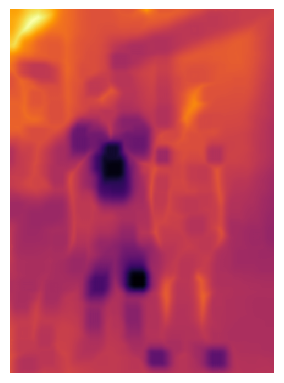

In [3]:
import os
import flyr
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

root_path=r'../数据库/Thermal Image of Faces for Temperature Detection/{num}-20220708T112727Z-001/{num}'

category=[3]

# show heatmap of temperature information 
def read_infrared_data(file):
  lines = open(file, "r", encoding='utf-8')
  data = []
  for line in lines:
    vs = line.strip().split(",")
    row = [float(v) for v in vs]
    data.append(row)
  return data

# dataset root
save_root_path='datasets/flir_data'

for c in tqdm(category):
    print(f"Category {c}:")
    root_path_temp=root_path.replace('{num}',str(c))
    
    # print(root_path_temp)
    folder=save_root_path+"/"+str(c)
    if not os.path.exists(folder):
       os.mkdir(folder)
    folder_raw=folder+"/raw"
    folder_optical=folder+"/optical"
    folder_thermal=folder+"/thermal"
    folder_csv=folder+"/csv"
    if not os.path.exists(folder_raw):
       os.mkdir(folder_raw)
    if not os.path.exists(folder_csv):
       os.mkdir(folder_csv)
    if not os.path.exists(folder_optical):
       os.mkdir(folder_optical)
    if not os.path.exists(folder_thermal):
       os.mkdir(folder_thermal)

    for file in tqdm(os.listdir(root_path_temp)):
        
        name, ext = os.path.splitext(file)
        # source file
        flir_path=root_path_temp+"/"+file
        if os.path.exists(folder_raw+"/"+name+".jpg"):
         continue
        try:
          # read thermal data
          thermogram = flyr.unpack(flir_path)
          # thermal = thermogram.kelvin  # As kelvin
          thermal = thermogram.celsius  # As celsius
          # thermal = thermogram.fahrenheit  # As fahrenheit
          # print(thermal)
          # print(f'width:{len(thermal[0])},height:{len(thermal)}')
          # csv file
          f_out=open(folder_csv+"/"+name+".csv",'w',encoding='utf-8')
          for m in thermal:
              line=[]
              for l in m:
                  line.append(str(l))
              f_out.write(','.join(line)+'\n')
          f_out.close()
          # optical
          optical_arr = thermogram.optical  # Also works
          thermogram.optical_pil.save(folder_optical+"/"+name+".jpg")
          # raw image
          shutil.copy(flir_path,folder_raw+"/"+name+".jpg")
          # thermal
          temp_data=read_infrared_data(folder_csv+"/"+name+".csv")

          sns.set(rc= {"figure.figsize": (3, 4)})

          # print(len(temp_data),len(temp_data[0]))
          ax = sns.heatmap(temp_data,
                          xticklabels=False,  # remove the labels
                          yticklabels=False,
                          cbar=False,
                          cmap='inferno'
                          )

          plt.tight_layout()

          # plt.show()

          plt.savefig(folder_thermal+"/"+name+".jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        except Exception as err:
           print(err)
           print(flir_path)
    print()
                
        